In [1]:
#This is Joe's exploratory scratch workb

In [2]:
#!pip install descartes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# import geopandas as geo
# import descartes as des

#from shapely.geometry import Point, Polygon
%matplotlib inline


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/houston-ds-042219-mod1-project/master/kc_house_data.csv')




In [5]:
!pwd

/Users/josephdown/mod1-project


In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
df.describe

<bound method NDFrame.describe of                id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014   221900.0         3       1.00         1180   
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
2      5631500400   2/25/2015   180000.0         2       1.00          770   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
7      2008000270   1/15/2015   291850.0         3       1.50         1060   
8      2414600126   4/15/2015   229500.0         3       1.00         1780   
9      3793500160   3/12/2015   323000.0         3       2.50         1890   
10     1736800520    4/3/2015   662500.0         3       2.50         3560   
11     9212900260   5/27/2014 

In [8]:
df.shape

(21597, 21)

In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
by_zipcode = df.groupby('zipcode')['price'].describe()

In [11]:
by_zipcode['zipcode']= by_zipcode.index

In [12]:
by_zipcode.head()

,count,mean,std,min,25%,50%,75%,max,zipcode
zipcode,,,,,,,,,
98001,361.0,2.811949e+05,98837.430520,100000.0,215000.0,260000.0,320000.0,850000.0,98001
98002,199.0,2.342840e+05,52041.448659,95000.0,199975.0,235000.0,268500.0,389000.0,98002
98003,280.0,2.941113e+05,107597.662236,128000.0,229000.0,267475.0,330000.0,950000.0,98003
98004,317.0,1.356524e+06,746094.067159,425000.0,845000.0,1150000.0,1690000.0,7060000.0,98004
98005,168.0,8.102897e+05,268979.168276,400000.0,637775.0,765475.0,911250.0,1960000.0,98005


In [13]:
by_zipcode.sort_values('mean', ascending=False, inplace = True)

In [14]:
by_zipcode.set_index('mean', inplace=True)

In [15]:
by_zipcode.head()

,count,std,min,25%,50%,75%,max,zipcode
mean,,,,,,,,
2.161300e+06,50.0,1.166904e+06,787500.0,1402500.0,1895000.0,2560000.0,6890000.0,98039
1.356524e+06,317.0,7.460941e+05,425000.0,845000.0,1150000.0,1690000.0,7060000.0,98004
1.194874e+06,282.0,6.077676e+05,500000.0,822000.0,993750.0,1387500.0,5300000.0,98040
1.096239e+06,269.0,5.942232e+05,169317.0,680000.0,915000.0,1330000.0,3400000.0,98112
8.996077e+05,104.0,7.903814e+05,330000.0,571875.0,710000.0,976175.0,7700000.0,98102


In [16]:
by_zipcode['mean']=by_zipcode.index

In [17]:
by_zipcode.head(10)

,count,std,min,25%,50%,75%,max,zipcode,mean
mean,,,,,,,,,
2.161300e+06,50.0,1.166904e+06,787500.0,1402500.0,1895000.0,2560000.0,6890000.0,98039,2.161300e+06
1.356524e+06,317.0,7.460941e+05,425000.0,845000.0,1150000.0,1690000.0,7060000.0,98004,1.356524e+06
1.194874e+06,282.0,6.077676e+05,500000.0,822000.0,993750.0,1387500.0,5300000.0,98040,1.194874e+06
1.096239e+06,269.0,5.942232e+05,169317.0,680000.0,915000.0,1330000.0,3400000.0,98112,1.096239e+06
8.996077e+05,104.0,7.903814e+05,330000.0,571875.0,710000.0,976175.0,7700000.0,98102,8.996077e+05
8.800778e+05,109.0,4.557008e+05,216650.0,620000.0,736000.0,1000000.0,3200000.0,98109,8.800778e+05
8.632289e+05,229.0,4.778332e+05,380000.0,550000.0,675000.0,1010000.0,3650000.0,98105,8.632289e+05
8.599386e+05,498.0,4.462724e+05,247500.0,575625.0,760184.5,977250.0,4210000.0,98006,8.599386e+05
8.497148e+05,184.0,4.340608e+05,300523.0,598750.0,744975.0,937750.0,3070000.0,98119,8.497148e+05


In [18]:
by_zipcode['zipcode_copy'] = by_zipcode['zipcode'].map(lambda x: '#{:d}'.format(x))

In [19]:
by_zipcode.sort_values('mean', inplace=True)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'mean' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Top 25 Zipcodes by Home Value')

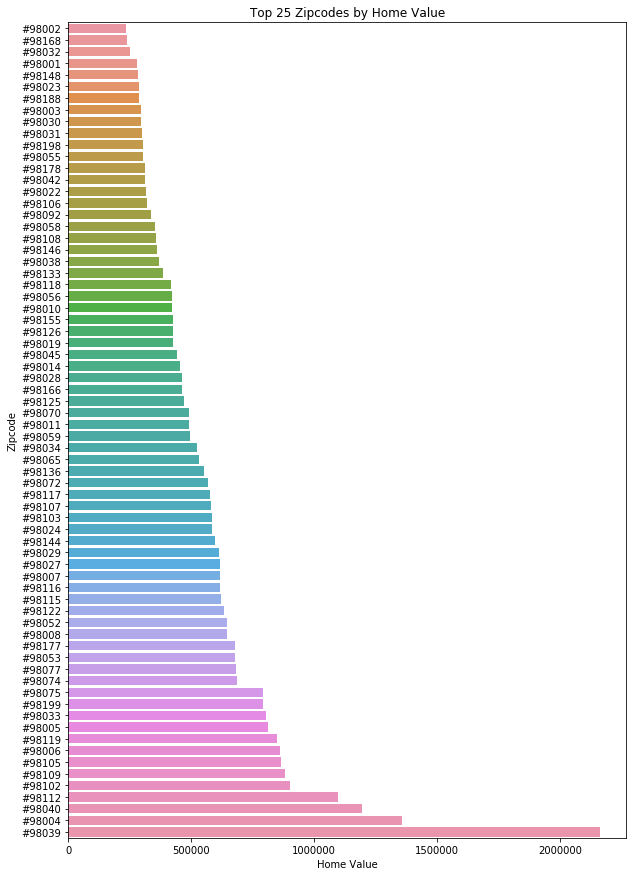

In [20]:
fig,ax = plt.subplots(figsize=(10,15))
sns.barplot(x='mean', y='zipcode_copy', data=by_zipcode[-25:], ax=ax, orient='h')
ax.set_xlabel('Home Value')
ax.set_ylabel('Zipcode')
ax.set_title('Top 25 Zipcodes by Home Value')

# a4_dims = (11.7, 8.27)
# df = mylib.load_data()
# fig, ax = pyplot.subplots(figsize=a4_dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)

In [21]:
by_zipcode.tail(25)

,count,std,min,25%,50%,75%,max,zipcode,mean,zipcode_copy
mean,,,,,,,,,,
6.126427e+05,321.0,2.153901e+05,285000.0,485000.0,575000.0,690000.0,2200000.0,98029,6.126427e+05,#98029
6.170540e+05,412.0,2.910077e+05,130000.0,450000.0,570500.0,715375.0,2700000.0,98027,6.170540e+05,#98027
6.172540e+05,141.0,2.003780e+05,295000.0,465000.0,555000.0,730000.0,1320000.0,98007,6.172540e+05,#98007
6.186951e+05,330.0,2.519461e+05,130000.0,460000.0,562750.0,699750.0,2050000.0,98116,6.186951e+05,#98116
6.199441e+05,583.0,2.375054e+05,200000.0,456750.0,567000.0,719000.0,2300000.0,98115,6.199441e+05,#98115
6.345581e+05,290.0,2.854355e+05,202000.0,451000.0,572000.0,718750.0,2050000.0,98122,6.345581e+05,#98122
6.452442e+05,574.0,1.975535e+05,225000.0,509437.5,615000.0,751000.0,2200000.0,98052,6.452442e+05,#98052
6.456282e+05,283.0,4.218750e+05,250000.0,465375.0,545000.0,658500.0,3570000.0,98008,6.456282e+05,#98008
6.764194e+05,255.0,4.363797e+05,245560.0,428500.0,554000.0,739475.0,3800000.0,98177,6.764194e+05,#98177


Text(0.5, 1.0, 'Bottom 25 Zipcodes by Home Value')

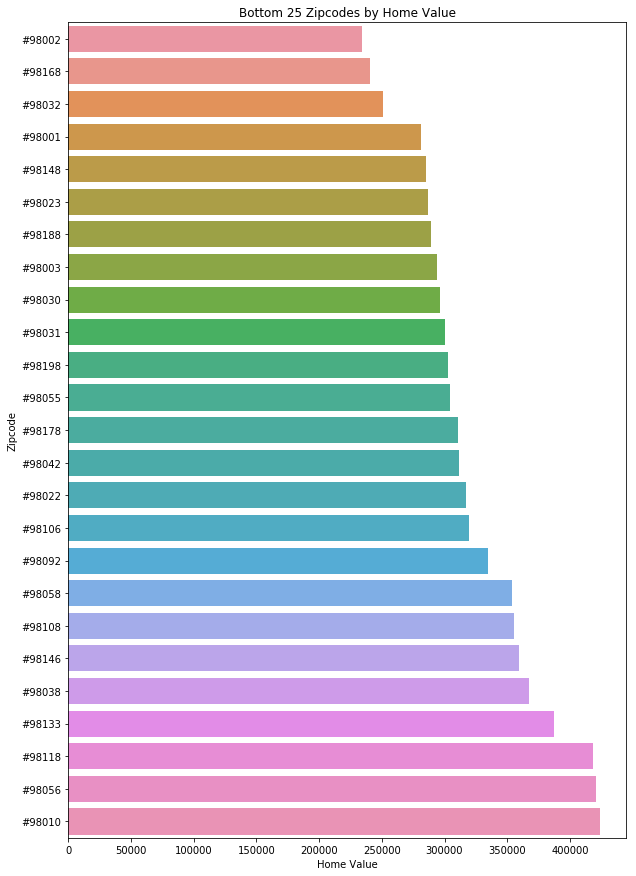

In [22]:
fig,ax = plt.subplots(figsize=(10,15))
sns.barplot(x='mean', y='zipcode_copy', data=by_zipcode.head(25), ax=ax, orient='h')
ax.set_xlabel('Home Value')
ax.set_ylabel('Zipcode')
ax.set_title('Bottom 25 Zipcodes by Home Value')

In [23]:
df.size

453537

In [24]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [25]:
df.waterfront.mean()


0.007595858696217679

In [26]:
#df.dtypes


In [27]:
housing_values = df


In [28]:
housing_values.waterfront.fillna(0, inplace= True)
                                

In [29]:
housing_values.view.median()

0.0

In [30]:
housing_values.view.fillna(housing_values.view.median(), inplace=True)

In [31]:
housing_values.yr_renovated.mean()

83.6367783722895

In [32]:
housing_values.yr_renovated.median()

0.0

In [33]:
housing_values.yr_renovated.fillna(housing_values.yr_renovated.median(), inplace=True)

In [34]:
housing_values.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [35]:
#df.isna().sum()

In [36]:
housing_values.sqft_basement.replace('?','0',inplace=True)

In [37]:
housing_values.sqft_basement = pd.to_numeric(housing_values.sqft_basement)

In [38]:
# f, axes = plt.subplots(4, 5)

# for x, column in enumerate(housing_values.drop(['id','date'], axis=1).columns):
#     sns.distplot(housing_values[column], ax=axes[x//4,x%3])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


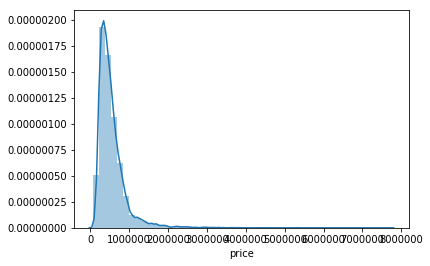

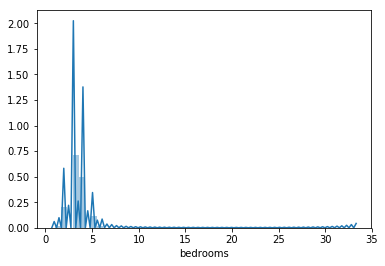

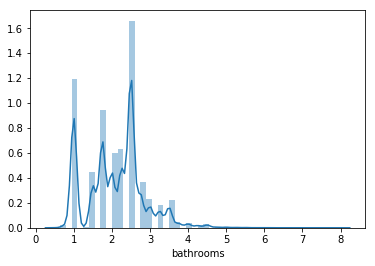

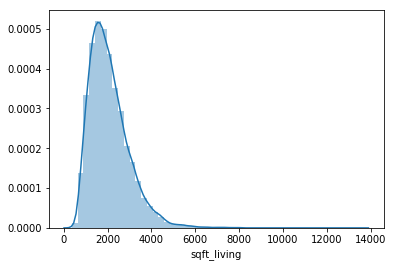

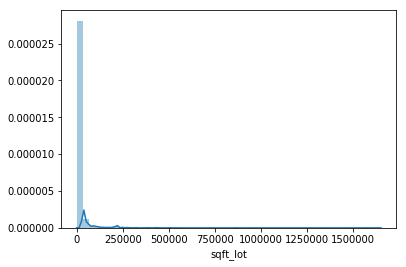

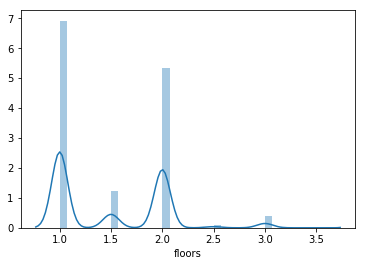

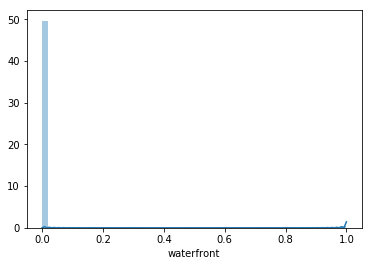

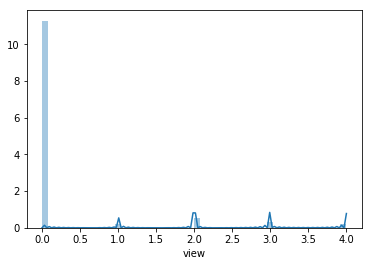

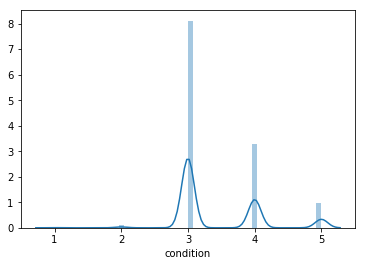

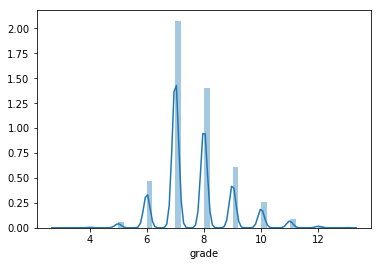

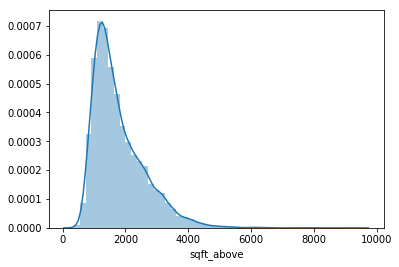

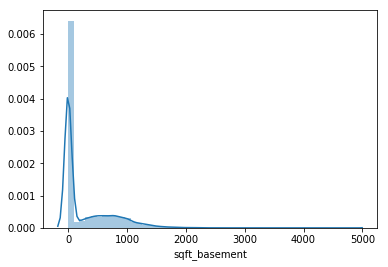

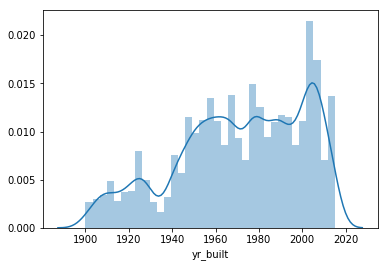

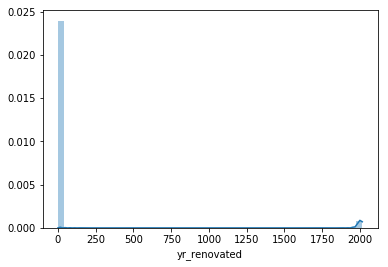

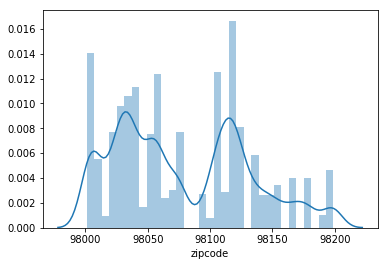

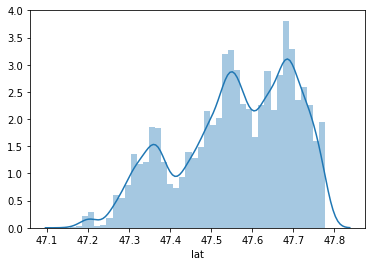

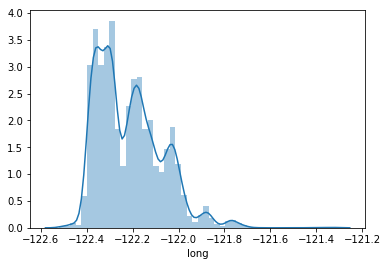

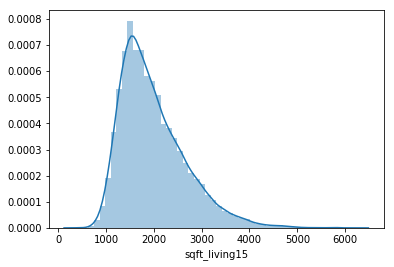

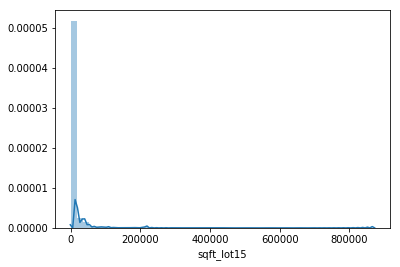

In [39]:
for column in housing_values.drop(['id','date'], axis=1).columns:
     sns.distplot(housing_values[column])
     plt.show()

In [40]:
pairplot_df = df.drop(['id','date'],axis=1)
 


In [41]:
pairplot_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [42]:
#sns.pairplot(pairplot_df)

In [43]:
housing_values.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [44]:
X = housing_values.drop(['id','date','price','view','floors','condition','yr_renovated','zipcode','lat','long'],axis=1)
y = housing_values.price
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 1.336e+04
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        09:24:08   Log-Likelihood:            -2.9763e+05
No. Observations:               21597   AIC:                         5.953e+05
Df Residuals:                   21586   BIC:                         5.954e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.064e+04   2178.252    -14.067      0.000   -3.49e+04   -2.64e+04
bathrooms     -1.963e+04   3298.189     -5.952      0.000   -2.61e+04   -1.32e+04
sqft_living     199.4914     20.864      9.561      0.000     158.596     240.387
sqft_lot          0.0667      0.055      1.204      0.229      -0.042       0.175
waterfront     8.136e+05   1.96e+04     41.485      0.000    7.75e+05    8.52e+05
grade           1.16e+05   2401.943     48.308      0.000    1.11e+05    1.21e+05
sqft_above      -27.3920     20.789     -1.318      0.188     -68.140      13.356
sqft_basement    44.3079     20.804      2.130      0.033       3.530      85.086
yr_built       -317.0347      7.559    -41.941      0.000    -331.851    -302.218
sqft_living15    22.2818      3.816      5.840      0.000      14.803      29.761
sqft_lot15       -0.7031      0.085     -8.301      0.000      -0.869      -0.537
==============================================================================
Omnibus:                    15556.915   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           897185.403
Skew:                           2.883   Prob(JB):                         0.00
Kurtosis:                      34.045   Cond. No.                     6.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
np.sqrt(np.mean((predictions-y)**2))

233821.12266008815

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


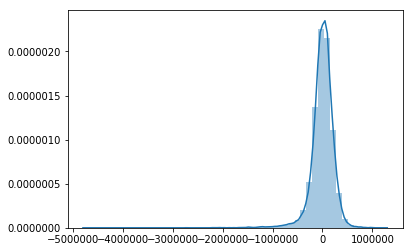

In [46]:
sns.distplot(predictions-y)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


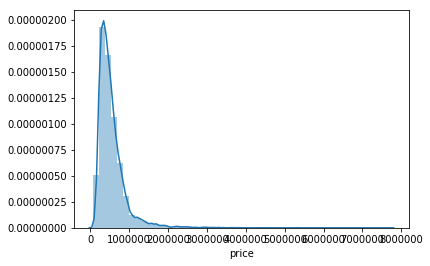

In [47]:
sns.distplot(y)

In [48]:
housing_values.yr_renovated.mean()


68.75820715840163

In [49]:
housing_values.loc[housing_values.yr_renovated>0]['yr_renovated'].describe()
        

count     744.000000
mean     1995.928763
std        15.599946
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.250000
max      2015.000000
Name: yr_renovated, dtype: float64

In [50]:
housing_values.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [51]:
housing_values.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [52]:
housing_values.yr_renovated = housing_values.yr_renovated.astype(int)

In [53]:
housing_values.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


In [54]:
housing_values.yr_renovated


0           0
1        1991
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
         ... 
21567       0
21568       0
21569       0
21570       0
21571       0
21572       0
21573       0
21574       0
21575       0
21576       0
21577       0
21578       0
21579       0
21580       0
21581       0
21582       0
21583       0
21584       0
21585       0
21586       0
21587       0
21588       0
21589       0
21590       0
21591       0
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21597, dtype: int64

In [55]:
holding_list_for_series = [0]*len(housing_values)
holding_string_for_date = '-01-01'

for index, house in  enumerate(housing_values.yr_renovated):
    holding_string_for_year = ''
    holding_string_together = ''
    if housing_values.yr_renovated[index] != 0:
        holding_string_for_year = str(housing_values.yr_renovated[index])
        holding_string_together = holding_string_for_year + holding_string_for_date
        #print(housing_values.yr_renovated[index].join(' '))
        holding_list_for_series[index] = holding_string_together
    else: 
        holding_string_for_year = str(housing_values.yr_built[index])
        holding_string_together = holding_string_for_year + holding_string_for_date
        #print(housing_values.yr_renovated[index].join(' '))
        holding_list_for_series[index] = holding_string_together

In [56]:
holding_list_for_series

['1955-01-01',
 '1991-01-01',
 '1933-01-01',
 '1965-01-01',
 '1987-01-01',
 '2001-01-01',
 '1995-01-01',
 '1963-01-01',
 '1960-01-01',
 '2003-01-01',
 '1965-01-01',
 '1942-01-01',
 '1927-01-01',
 '1977-01-01',
 '1900-01-01',
 '1979-01-01',
 '1994-01-01',
 '1916-01-01',
 '1921-01-01',
 '1969-01-01',
 '1947-01-01',
 '1968-01-01',
 '1995-01-01',
 '1985-01-01',
 '1985-01-01',
 '1941-01-01',
 '1915-01-01',
 '1909-01-01',
 '1948-01-01',
 '2005-01-01',
 '2003-01-01',
 '2005-01-01',
 '1929-01-01',
 '1929-01-01',
 '1981-01-01',
 '2002-01-01',
 '1933-01-01',
 '1904-01-01',
 '1969-01-01',
 '1996-01-01',
 '2000-01-01',
 '1984-01-01',
 '2014-01-01',
 '1922-01-01',
 '1959-01-01',
 '2003-01-01',
 '1966-01-01',
 '1981-01-01',
 '1953-01-01',
 '1953-01-01',
 '1955-01-01',
 '1966-01-01',
 '1950-01-01',
 '1981-01-01',
 '1927-01-01',
 '1995-01-01',
 '2008-01-01',
 '2003-01-01',
 '1968-01-01',
 '1991-01-01',
 '1959-01-01',
 '1954-01-01',
 '1973-01-01',
 '2014-01-01',
 '1979-01-01',
 '1925-01-01',
 '1989-01-

In [57]:
# finalized_string_list=['']*len(holding_list_for_series)
# for index, list_item in enumerate(holding_list_for_series):
#     for value in list_item:
#         print(type(value))
#         print('##')
        #value = str(int(value))
        #finalized_string_list[index]+=value

In [58]:
housing_values['yrRenDT'] = holding_list_for_series

In [59]:
housing_values.yrRenDT.head()

0    1955-01-01
1    1991-01-01
2    1933-01-01
3    1965-01-01
4    1987-01-01
Name: yrRenDT, dtype: object

In [98]:
housing_values.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrRenDT,time_since_rennovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,1955-01-01,21835
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,1991-01-01,8743
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,1933-01-01,30005
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,1965-01-01,18239
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,1987-01-01,10275


In [60]:
housing_values['date'] =  pd.to_datetime(housing_values['date'])



In [61]:
housing_values['yrRenDT'] =  pd.to_datetime(housing_values['yrRenDT'])



In [62]:
pd.to_datetime(housing_values.yr_renovated[1])

Timestamp('1970-01-01 00:00:00.000001991')

In [63]:
time_since_rennovated = housing_values['date']-housing_values['yrRenDT']



In [64]:
time_since_rennovated

0       21835 days
1        8743 days
2       30005 days
3       18239 days
4       10275 days
5        4879 days
6        7117 days
7       19007 days
8       20193 days
9        4453 days
10      18354 days
11      26444 days
12      31924 days
13      13793 days
14      42073 days
15      13172 days
16       7516 days
17      35943 days
18      34306 days
19      16914 days
20      24605 days
21      17039 days
22       7123 days
23      10727 days
24      10915 days
25      26969 days
26      36336 days
27      38685 days
28      24281 days
29       3712 days
           ...    
21567   26093 days
21568    2892 days
21569    2065 days
21570    2113 days
21571    3350 days
21572    2873 days
21573    1713 days
21574    2690 days
21575     274 days
21576    2662 days
21577    3362 days
21578    2481 days
21579    3225 days
21580     224 days
21581    3032 days
21582     285 days
21583    4275 days
21584    2479 days
21585    2653 days
21586     176 days
21587    4254 days
21588     39

In [65]:
for value in time_since_rennovated:
    value = int((value / np.timedelta64(1, 'D')))
               

In [66]:
# housing_values.rename(columns={'time_since_rennovated':'days_since_rennovated'}, inplace=True)
housing_values['time_since_rennovated']=time_since_rennovated


In [67]:
int_holding_list = housing_values['time_since_rennovated'].astype('timedelta64[D]').astype(int)

In [68]:
time_since_rennovated[1]

Timedelta('8743 days 00:00:00')

In [69]:
housing_values['time_since_rennovated']=int_holding_list

In [70]:
housing_values.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrRenDT,time_since_rennovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,1955-01-01,21835
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,1991-01-01,8743
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,1933-01-01,30005


In [71]:
housing_values.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yrRenDT',
       'time_since_rennovated'],
      dtype='object')

In [72]:
housing_values_2 = housing_values[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yrRenDT', 'time_since_rennovated']]

In [73]:
housing_values_2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yrRenDT',
       'time_since_rennovated'],
      dtype='object')

In [74]:
housing_values_2.dtypes

id                                int64
date                     datetime64[ns]
price                           float64
bedrooms                          int64
bathrooms                       float64
sqft_living                       int64
sqft_lot                          int64
floors                          float64
waterfront                      float64
view                            float64
condition                         int64
grade                             int64
sqft_above                        int64
sqft_basement                   float64
yr_built                          int64
yr_renovated                      int64
zipcode                           int64
lat                             float64
long                            float64
sqft_living15                     int64
sqft_lot15                        int64
yrRenDT                  datetime64[ns]
time_since_rennovated             int64
dtype: object

In [75]:
housing_values.time_since_rennovated.describe()

count    21597.000000
mean     15296.592536
std      10573.957542
min       -226.000000
25%       5961.000000
50%      13779.000000
75%      22328.000000
max      42134.000000
Name: time_since_rennovated, dtype: float64

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


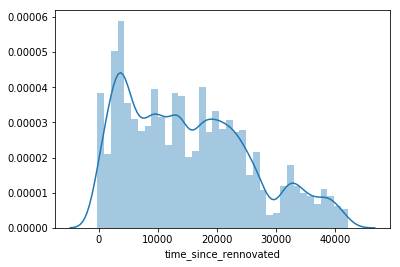

In [76]:
sns.distplot(housing_values_2.time_since_rennovated)


In [77]:
# housing_values['recent_renovation'] = recent_renovation
# housing_values.head()



In [78]:
housing_values_2.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yrRenDT',
       'time_since_rennovated'],
      dtype='object')

In [79]:
#housing_values_2.loc[housing_values_2.days_since_rennovated > , 'my_channel'] = 0



In [80]:
X = housing_values_2.drop(['id','date','price','view','floors','condition','yr_renovated','zipcode','lat','long','yrRenDT'],axis=1)
y = housing_values_2.price
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 1.379e+04
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        09:24:11   Log-Likelihood:            -2.9651e+05
No. Observations:               21597   AIC:                         5.930e+05
Df Residuals:                   21585   BIC:                         5.931e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -4.188e+04   2080.425    -20.132      0.000    -4.6e+04   -3.78e+04
bathrooms              5.236e+04   3461.859     15.125      0.000    4.56e+04    5.91e+04
sqft_living             137.1627     19.846      6.911      0.000      98.264     176.062
sqft_lot                  0.0092      0.053      0.174      0.862      -0.094       0.112
waterfront              7.77e+05   1.86e+04     41.705      0.000    7.41e+05    8.14e+05
grade                  1.271e+05   2291.142     55.462      0.000    1.23e+05    1.32e+05
sqft_above               27.7451     19.765      1.404      0.160     -10.996      66.486
sqft_basement            48.6212     19.747      2.462      0.014       9.915      87.328
yr_built               -470.0286      7.832    -60.013      0.000    -485.380    -454.677
sqft_living15            23.9417      3.622      6.610      0.000      16.843      31.041
sqft_lot15               -0.5847      0.080     -7.268      0.000      -0.742      -0.427
time_since_rennovated     8.4691      0.174     48.719      0.000       8.128       8.810
==============================================================================
Omnibus:                    16074.553   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1077721.927
Skew:                           2.986   Prob(JB):                         0.00
Kurtosis:                      37.088   Cond. No.                     6.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
np.sqrt(np.mean((predictions-y)**2))


221936.9004083649

In [82]:
#by_zipcode.head(3)



In [83]:
by_zipcode.sort_values('mean', inplace=True)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'mean' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [84]:
#by_zipcode.tail()

In [85]:
zipcode_rank_list = [0]*len(by_zipcode.zipcode)
for index, zipcode in enumerate(by_zipcode.zipcode):
    zipcode_rank = [0,0]
    zipcode_rank[0]= zipcode
    zipcode_rank[1]= index**2
    zipcode_rank_list[index]=zipcode_rank
    

In [86]:
housing_values_3=housing_values_2

In [87]:
housing_values_3['zipcode_rank']=[0]*len(housing_values.zipcode)

In [88]:
rank_holding_list = [0]*len(housing_values_3.zipcode)
for index, zipcode in enumerate(housing_values_3.zipcode):
     for rank in zipcode_rank_list:
         if zipcode==rank[0]:
             rank_holding_list[index]=rank[1]

In [89]:
housing_values_3.zipcode_rank=rank_holding_list

In [90]:
#housing_values_3.zipcode_rank.value_counts()


In [91]:
X = housing_values_3.drop(['id','date','price','view','floors','condition','yr_renovated','zipcode','lat','long','yrRenDT'],axis=1)
y = housing_values_3.price
#need to add a constant value?  See example below
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

# import statsmodels.api as sm
# predictors_int = sm.add_constant(predictors)
# model = sm.OLS(data['mpg'],predictors_int).fit()
# model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.830e+04
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        09:24:11   Log-Likelihood:            -2.9297e+05
No. Observations:               21597   AIC:                         5.860e+05
Df Residuals:                   21584   BIC:                         5.861e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -3.526e+04   1767.755    -19.948      0.000   -3.87e+04   -3.18e+04
bathrooms              3.428e+04   2945.744     11.638      0.000    2.85e+04    4.01e+04
sqft_living             146.0742     16.849      8.670      0.000     113.048     179.100
sqft_lot                  0.1712      0.045      3.829      0.000       0.084       0.259
waterfront             8.358e+05   1.58e+04     52.796      0.000    8.05e+05    8.67e+05
grade                  7.502e+04   2026.731     37.017      0.000    7.11e+04     7.9e+04
sqft_above               47.2321     16.782      2.814      0.005      14.339      80.126
sqft_basement            41.1883     16.766      2.457      0.014       8.326      74.050
yr_built               -300.0858      6.904    -43.464      0.000    -313.619    -286.553
sqft_living15           -18.8238      3.110     -6.052      0.000     -24.920     -12.727
sqft_lot15               -0.3943      0.068     -5.771      0.000      -0.528      -0.260
time_since_rennovated     5.4373      0.151     35.946      0.000       5.141       5.734
zipcode_rank             99.9106      1.093     91.445      0.000      97.769     102.052
==============================================================================
Omnibus:                    20435.295   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3009753.623
Skew:                           4.145   Prob(JB):                         0.00
Kurtosis:                      60.235   Cond. No.                     6.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
np.sqrt(np.mean((predictions-y)**2))


188419.12577685495

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


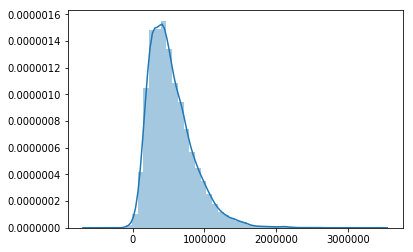

In [93]:
sns.distplot(predictions)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


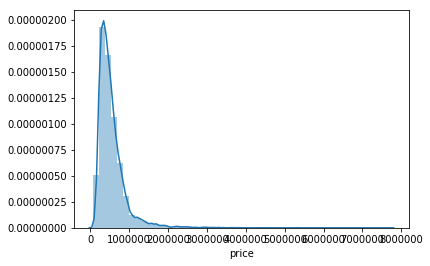

In [94]:
sns.distplot(y)

In [95]:
housing_values_3.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [96]:
7,700,000

(7, 700, 0)

In [97]:
450000

450000

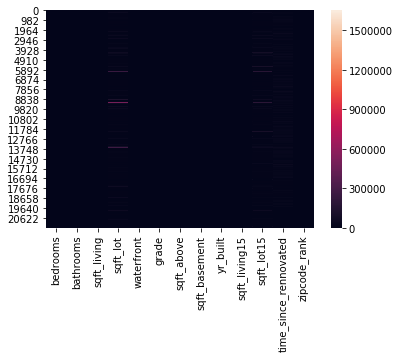

In [104]:
sns.heatmap(housing_values_3.drop(['id','date','price','view','floors','condition','yr_renovated','zipcode','lat','long','yrRenDT'],axis=1))

In [101]:
(abs(housing_values_3.corr()>.75))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_since_rennovated,zipcode_rank
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
